# **Exploring and Predicting Students' Academic Performance Through Personal and Social Attributes**
##### DSCI100 Group Project
##### Members: Davis Li (#75663989), Saumya Pandey (#68450519), Alaina Rara (#70927348), Reuben John (#55389571)

## **Introduction**
Education  is  an  essential  human  virtue,  a necessity  of  society,  the basis  of  good  life  and a sign of  freedom. It  is  important  for integration  of  separate  entities. (Bhardwaj, 2016). Education plays a key role in our society, both economically and socially. However, it is also widely noted that not all students perform equally well in school and instead wide disparities in student’s academic scores exist despite attending the same classes. These differences result in a great variation in opportunities later on in life, such as the kind of university one is able to attend, the ability to secure a high-paying job, and the general quality of life overall. These are indicators of one’s success in life and it is evident education is an incredibly influential factor for the same. Essentially, the quality of education of a country determines its productivity levels, thus affecting the growth of entire economies as a whole. Hence, it is imperative to understand how the various social and demographic aspects of an individual’s life affect their academic performance and subsequently work to create systems that help improve education.

In this project, we are trying to answer: **“What are the factors that affect high school students’ academic performance in math, and how can we use these factors to predict performance in the future?”**

The dataset selected collects student profiles and performance from two Portuguese high schools in Portuguese and Mathematics class. For the purpose of our study, we have selected math, as it is a universal subject, to study student performance to ensure the study can be generalized to a wider global population. The data is collected through school reports and questionnaires. There are 33 data attributes which will serve as indicators of student achievement. These attributes include grades, school resources, demographic indicators, and social factors. 



## **Method**
### 1.Preliminary Exploratory Data Analysis: 

Overview:
- First, we load all the necessary libraries required for us to perform our data analysis. These include the  tidyverse, repr, tidymodels, reshape2 and ggplot2 libraries. 
- Then  we read the dataset into R from an online UCI Machine Learning Repository by using the read_csv2 code 
- After loading the dataset, we go over all the variables and select the ones that seem most significant in regards to answering our research question. 



In [1]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(digest)
library(reshape2)
library(ggplot2)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
set.seed(1)

# reading the dataset from online UCI Machine Learning Repository

temp <- tempfile()
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", temp)
data <- read_csv2(unz(temp, "student-mat.csv"))
unlink(temp)

head(data)


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


### 2.Wrangling and Cleaning

Overview:
- Before performing any analysis using the data, we had to ensure that our data is wrangled and cleaned. 
- Going over the dataset, we observed that it was already in a tidy format.
- However, some of the  variables were classified as characters. We mutated these variable columns to convert the data type from character to factor, in order for them to be treated as categories when performing our analysis.


In [3]:
set.seed(1)

# Looking at the variables we have
# Seems like the dataset from above is already in Tidy Format! However, 
# some of these variables classified as characters  
glimpse(data)

Rows: 395
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2, 1, 1, 1,

In [4]:
set.seed(1)

# Turn discrete variables into factors instead of characters
data <- data %>%
    mutate(across(school:sex, as.factor)) %>%
    mutate(across(address:health, as.factor)) 
glimpse(data)

Rows: 395
Columns: 33
$ school     <fct> GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP…
$ sex        <fct> F, F, F, F, F, M, M, F, M, M, F, F, M, M, M, F, F, F, M, M…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <fct> U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U…
$ famsize    <fct> GT3, GT3, LE3, GT3, GT3, LE3, LE3, GT3, LE3, GT3, GT3, GT3…
$ Pstatus    <fct> A, T, T, T, T, T, T, A, A, T, T, T, T, T, A, T, T, T, T, T…
$ Medu       <fct> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <fct> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <fct> at_home, at_home, at_home, health, other, services, other,…
$ Fjob       <fct> teacher, other, other, services, other, other, other, teac…
$ reason     <fct> course, course, other, home, home, reputation, home, home,…
$ guardian   <fct> mother, father, mother, mother, father, mother, mother, mo…
$ traveltime <fct> 2, 1, 1, 1,

### 3.Splitting the data 

Overview:
- In order to ensure that the accuracy model we create is not affected or biased by our current dataset, we split the data into training and testing data.
- 75% of the data is used to train the model, 25% is used as testing data.
- The testing data is kept aside, and will only be used to evaluate the accuracy of the model. It is not used in training the model.
- It is also ensured that our training data contains no ‘NA’ values, that would hinder the working of the model.
- We also summarized our training data to look at the statistics, such as the mean and median for each variable category, to gage a better understanding of the data we are working with,


In [5]:
set.seed(1)

#splitting 75% into training set and 25% into testing set
student_split <- initial_split(data, prop = 3/4, strata = G3)  
student_train <- training(student_split)   
student_test <- testing(student_split)

In [6]:
set.seed(1)

# See if there are NA's in the training set
# There are no NA's in the training set! 
sum(is.na(student_train))

[1] 0

In [7]:
set.seed(1)

# Looking at summary statistics for training set
# Doing this will allow us to explore the data and give us a quick idea if there is anything wrong with the data. For example, since we are studying
# on highschool students, a Max age of 82 would not make much sense. This is just an example though, as actual max age here is 22. 
summary(student_train)

 school   sex          age        address famsize   Pstatus Medu    Fedu  
 GP:266   F:147   Min.   :15.00   R: 67   GT3:208   A: 32   0:  2   0: 0  
 MS: 32   M:151   1st Qu.:16.00   U:231   LE3: 90   T:266   1: 45   1:63  
                  Median :17.00                             2: 75   2:81  
                  Mean   :16.68                             3: 73   3:79  
                  3rd Qu.:18.00                             4:103   4:75  
                  Max.   :22.00                                           
       Mjob          Fjob            reason      guardian   traveltime
 at_home :43   at_home : 14   course    :110   father: 61   1:194     
 health  :28   health  : 15   home      : 79   mother:215   2: 79     
 other   :99   other   :166   other     : 24   other : 22   3: 19     
 services:78   services: 84   reputation: 85                4:  6     
 teacher :50   teacher : 19                                           
                                                 

### 4.Visualizing Data

- Our next step is to visualise the data to determine which variables correlate more to the variable we are trying to predict- G3 (Final grade of student)
- We expect that G1 (Grades of students in the 1st term) and G2 (Grades of students in the 2nd term) will be highly correlated. To see if this holds true, we plot scatterplots with G1 on x-axis and G3 on the y-axis and G2 on x-axis and G3 on the y-axis  
- We also expect age (age of students) and absences (number of leaves from school taken) to be decently correlated to G3. 
- We plot the distribution of age to see what we are working with!
- Finally, to see which variables have the strongest correlation amongst all these selected variables (G1,G2, Age, Absences and G3), we plot a correlation graph.
- From this correlation graph, we are able to infer  that G1 and G2  are highly correlated to the final grade. Absences is also slightly correlated. Age however shows a weak correlation to G3 and thus is deemed as a bad predictor to use to predict G3 values. 

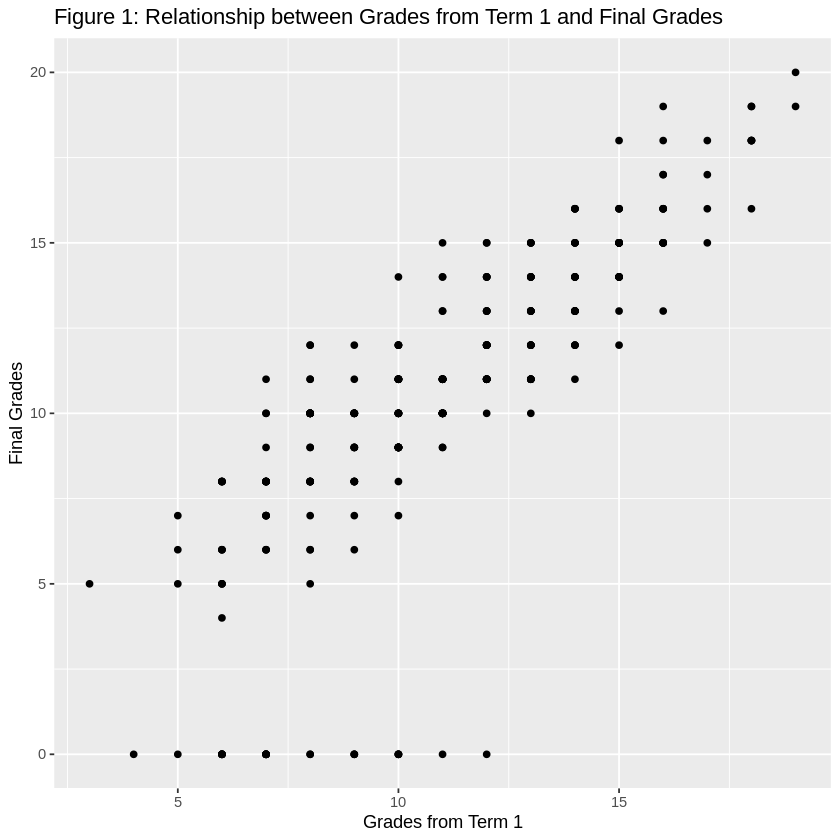

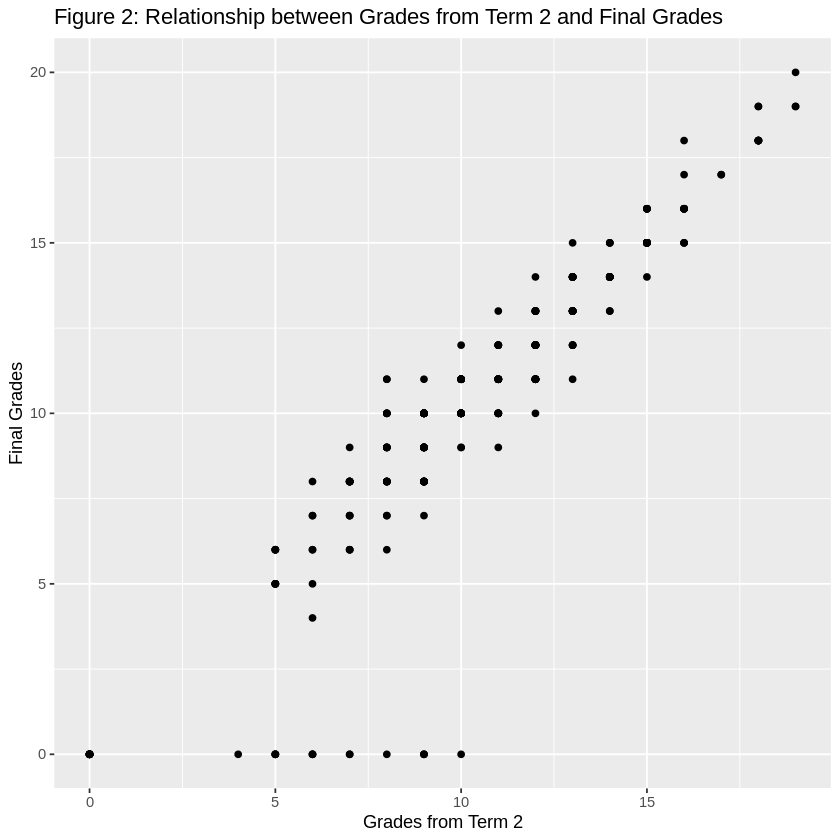

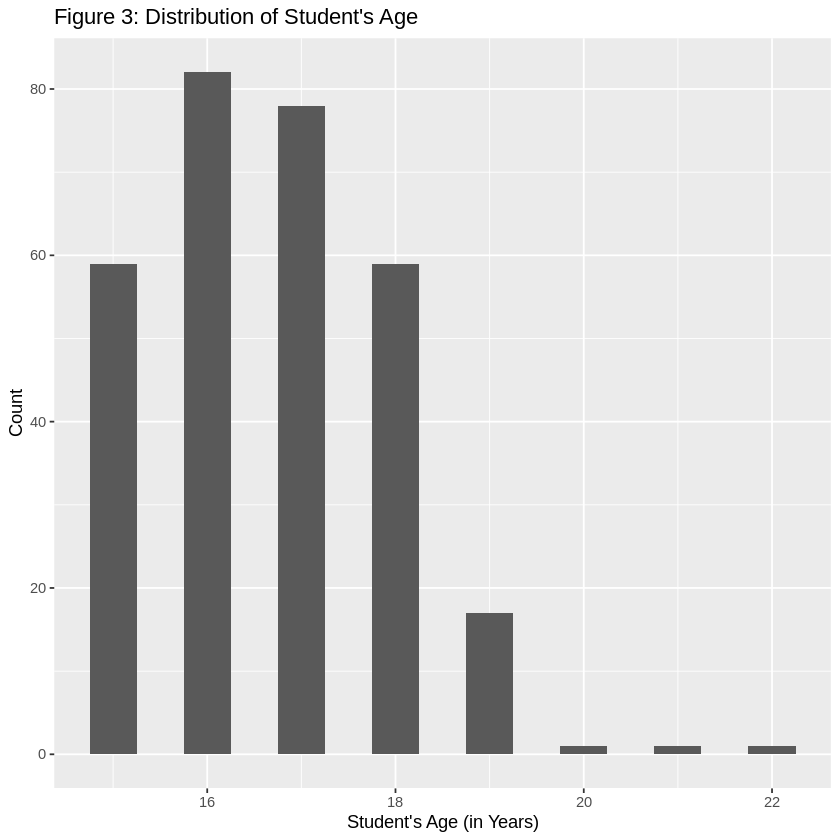

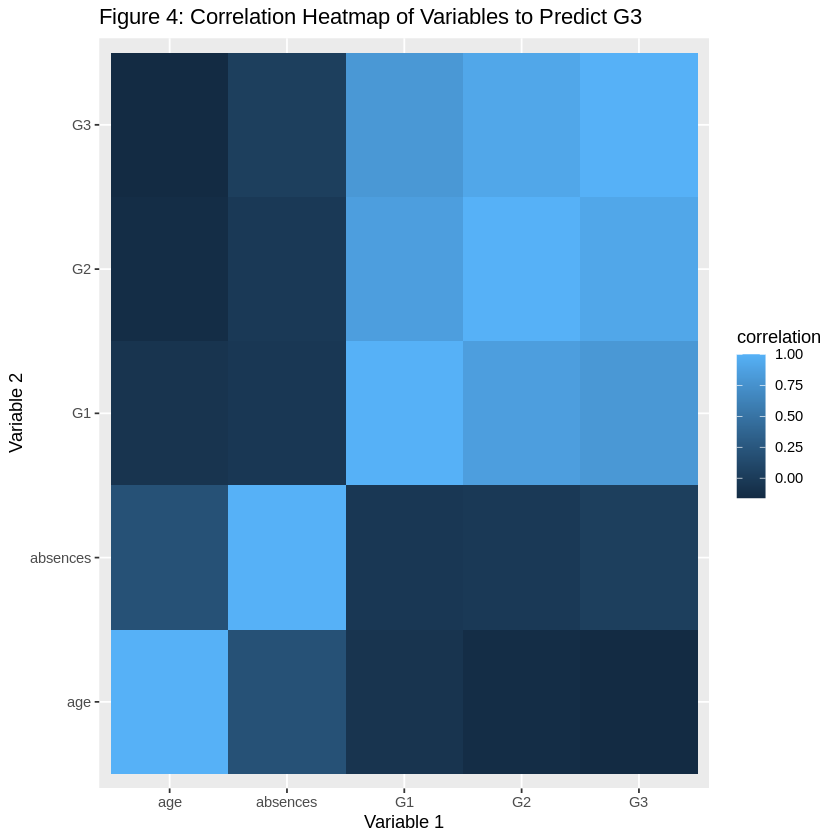

In [22]:
set.seed(1)


# Visualizing 2 plots with variables that we think will impact final grades, 1 plot about distribution of a variable, and 1 plot about correlation heatmap
G1_G3_plot <- student_train %>%
    ggplot(aes(x = G1, y= G3)) +
    geom_point() +
    labs(x = "Grades from Term 1", y = "Final Grades") + 
    ggtitle("Figure 1: Relationship between Grades from Term 1 and Final Grades")

G2_G3_plot <- student_train %>%
    ggplot(aes(x = G2, y= G3)) +
    geom_point() +
    labs(x = "Grades from Term 2", y = "Final Grades") + 
    ggtitle("Figure 2: Relationship between Grades from Term 2 and Final Grades")

age_plot <- student_train %>%
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Student's Age (in Years)", y = "Count") + 
    ggtitle("Figure 3: Distribution of Student's Age")

student_train_select <- student_train %>%
    select(age, absences, G1, G2, G3)



cormat <- round(cor(student_train_select),2)
melted_cormat <- melt(cormat)
corr_plot <- ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile() +
    ggtitle("Figure 4: Correlation Heatmap of Variables to Predict G3") +
    labs(x = "Variable 1", y = "Variable 2", fill = "correlation")

G1_G3_plot
G2_G3_plot
age_plot
corr_plot

#### ^^From this correlation graph above, we can see that G1 (grades from term 1) and G2 (grades from term 2) are highly correlated to final grade. Absences is also slightly correlated. Age is not really correlated at all.




### 5.Building a regression model specification
- To answer our research question in the beginning, we want to build a model and try to predict final grades based on student attributes. 
- Regression analysis is a statistical technique for estimating the relationship among variables which have reason and result relation (Uyanık & Güler, 2013). Since we have to deal with predicting numerical values, we set the mode of the model to regression. 
- Because our visualization also shows that ‘absences’ demonstrate only decent correlation with G3, we aim to build 2 types of models- 1) which contains the predictors G1, G2 and absences, and 2) Which only includes the predictors G1 and G2
- We use both K-NN as well as linear regression and then determine which method works more accurately in predicting the values of students' grades. 
- As a result, we will create 4 different models and use the one that is able to make the most accurate predictions. For better understanding the table summarizes the 4 models we tested.


**4 Models we want to test**

Figure 5:

| Model      | Predictors |
| ----------- | ----------- |
| Linear Regression | G1, G2, Absences |
| Linear Regression | G1, G2|
| KNN Regression   | G1, G2, Absences  |
| KNN Regression   | G1, G2  |

Before actually building the model, we wanted to come up with some hypothesis of what we're expecting to see. Doing this is important as it allows us to sense check our results at the end to see if it makes sense:

Here are our hypotheses
- Given the visualizations above, it seems that the relationships between G1/G2 to G3 are mostly linear. We believe that a linear model will yield better results
- In the correlation table, we've identified that G1 and G2 have high correlation with G3. Absences only has a decent relationship with G3. However, we still think that adding absences will improve the model.

### 5. (A) Linear Regression

Overview:
- Before building the model, we wanted to visualize the linear relationship of our predictors with G3 to do some sense checking
- Using linear regression we obtained 2 of our desired models, we calculated the RMSPE to find that both G1+G2 model and G1+G2+Absences model are quite similar, at 2.41 vs 2.44 RMSPE value respectively.
- However, a positive correlation was found between absences and final grades. Ideally, a higher number of absences should result in a lower final grade. Since analysing this paradox was beyond the scope of our abilities, the G1+G2 model was decided to be a better one for our analysis.


#### Visualization of Linear Relationships between Predictors and G3

Before building the linear regression model, we plotted G1, G2 and Absences against G3 individually to see how linear the relationship is. It seems like G1 and G2 are linear, but absences isn't really. 


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



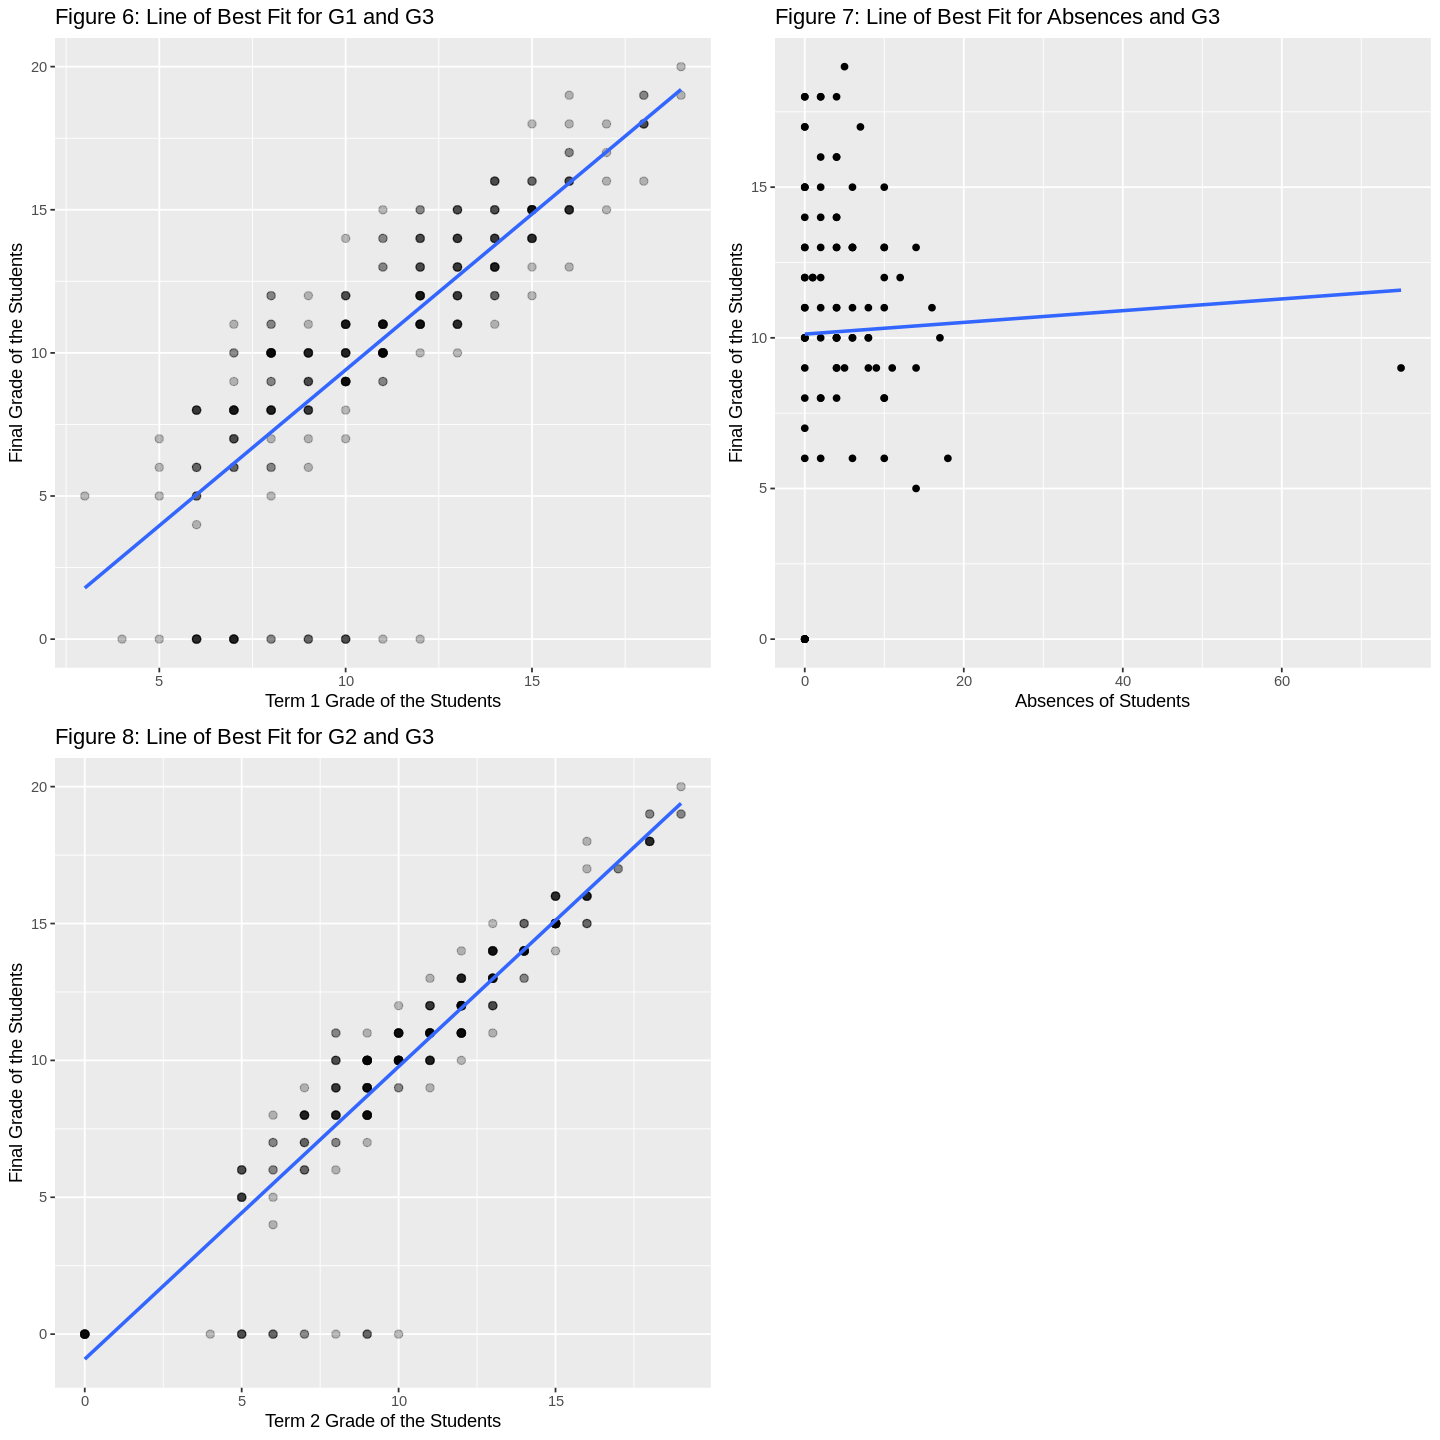

In [29]:
set.seed(1)
require(gridExtra)
options(repr.plot.width = 12, repr.plot.height = 12)


# Visualizing the model predictions as a straight line overlaid on the training data
lm_predictions_2 <- student_train %>%
    ggplot(aes(x = G1, y = G3)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(method = "lm", se = FALSE) +
        xlab("Term 1 Grade of the Students") +
        ylab("Final Grade of the Students") +
        ggtitle("Figure 6: Line of Best Fit for G1 and G3")


# Visualizing the model predictions as a straight line overlaid on the test data
lm_predictions_test_2 <- student_test %>%
    ggplot(aes(x=absences, y=G3)) +
        geom_point()+
        labs(x="Absences of Students", y="Final Grade of the Students")+
        geom_smooth(method = "lm", se= FALSE) +
        ggtitle("Figure 7: Line of Best Fit for Absences and G3")

# Visualizing the model predictions as a straight line overlaid on the training data
lm_predictions_3 <- student_train %>%
    ggplot(aes(x = G2, y = G3)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(method = "lm", se = FALSE) +
        xlab("Term 2 Grade of the Students") +
        ylab("Final Grade of the Students") +
        ggtitle("Figure 8: Line of Best Fit for G2 and G3")



plot_grid(lm_predictions_2, lm_predictions_test_2, lm_predictions_3)

#### Linear Regression with G1, G2, and Absences as the predictors

In [10]:
set.seed(1)

# Building a linear regression model specification
lm_spec <- linear_reg() %>% 
set_engine("lm") %>%
set_mode("regression") 

In [11]:
set.seed(1)

# Creating a recipe to predict G3 with G1, G2 and absences using the training dataset.
# Establishing a workflow analysis with the model specification and recipe and fitting our training dataset to the linear regression model.
# Suprisingly, the slope absences is positive, indicating that higher absences is associated with higher grades. We do not quite understand this 

lm_recipe <- recipe(G3 ~ G1 + G2 + absences, data = student_train)

lm_fit <- workflow() %>%
            add_recipe(lm_recipe) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G1           G2     absences  
   -1.41861      0.09610      1.00011      0.03007  


In [12]:
set.seed(1)
# Calculating the RMSPE using the test data


lm_test_results <- lm_fit %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe <- lm_test_results %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()


lm_rmspe


[1] 2.411621

##### Results:
We achieve a RMSPE of 2.41. Just using this model, we have nothing to compare this to so we don't really know if this is good or bad. Let's run the other models and see how they compare! 

#### Linear Regression with G1 and G2 as the predictors

In [13]:
set.seed(1)

# Creating a recipe to predict G3 with G1 and G2 using the training dataset.
# Establishing a workflow analysis with the model specification and recipe and fitting our training dataset to the linear regression model.

lm_recipe_1 <- recipe(G3 ~ G1 + G2, data = student_train)

lm_fit_1 <- workflow() %>%
            add_recipe(lm_recipe_1) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit_1

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G1           G2  
   -1.20571      0.09018      1.00316  


In [14]:
set.seed(1)

# Calculating the RMSPE using the test data


lm_test_results_1 <- lm_fit_1 %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe_1 <- lm_test_results_1 %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmspe_1

[1] 2.448029

##### Results:
We got a RMSPE of 2.44, which is slightly worse than the first model with absences! 

### 5. B) K-nearest neighbors regression:

Overview:
- We then turn to the second kind of regression ‘K- nearest neighbor regression’’  to see if it can be more effective in predicting the desired outcomes. 
- By performing a 5-fold cross-validation on a set of numbers from 1 to 20, we are able to determine that using k= 5 gives the smallest RMSE of 1.807127.
- Now we use K=5 in our model. By using just the 2 predictors G1 and G2, we get an RMSPE of 2.724762. When using all 3 predictors- G1,G2 and Absences, the RMSPE is slightly lower, with a value of 2.402479.


#### KNN Regression with G1 and G2 as the predictors

In [15]:
set.seed(1)

# Creating a model specification for K-nearest neighbors regression;
# Creating a recipe for preprocessing our data, 
# creating a 5-fold cross validation object, and putting the recipe and model specification together in a workflow.
# Running cross validation for a grid of numbers of neighbors ranging from 1 to 20.
# Finding the minimum RMSPE and along with it's associated metrics such as the mean and standard error, to help us find the number of neighbors that will 

student_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

student_recipe <- recipe(G3 ~ G1 + G2, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

gridvals <- tibble(neighbors = seq(1, 20))

student_multi <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  tune_grid(student_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))

student_k <- student_multi %>%
              pull(neighbors)

student_multi

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,1.807127,5,0.1825799,Model05


This shows that the smallest RMSPE occurs when K= 5

In [30]:
set.seed(1)

# Re-training the model on the entire training data set with K=5, and then using that model to make predictions on the test data.

student_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = student_k) %>%
  set_engine("kknn") %>%
  set_mode("regression")

knn_mult_fit <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec_2) %>%
  fit(data = student_train)

knn_mult_preds <- knn_mult_fit %>%
  predict(student_test) %>%
  bind_cols(student_test)

knn_mult_mets <- metrics(knn_mult_preds, truth = G3, estimate = .pred) %>%
                     filter(.metric == 'rmse')
knn_mult_mets

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.724762


##### Results:
We got a RMSPE of 2.72, which is worse than the other 2 models.

#### KNN Regression with G1, G2 and Absences as the predictors

In [33]:
set.seed(1)

# Creating a model specification for K-nearest neighbors regression;
# Creating a recipe for preprocessing our data, 
# Creating a 5-fold cross validation object, and putting the recipe and model specification together in a workflow.
# Running cross validation for a grid of numbers of neighbors ranging from 1 to 20.
# Finding the minimum RMSPE and along with it's associated metrics such as the mean and standard error, to help us find the optimal number of neighbors

student_spec_3 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

student_recipe_3 <- recipe(G3 ~ G1 + G2 + absences, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_vfold_3 <- vfold_cv(student_train, v = 5, strata = G3)

gridvals <- tibble(neighbors = seq(1, 20))

student_multi_3 <- workflow() %>%
  add_recipe(student_recipe_3) %>%
  add_model(student_spec_3) %>%
  tune_grid(student_vfold_3, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))

student_k_3 <- student_multi_3 %>%
              pull(neighbors)

student_multi_3

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,1.446857,5,0.126676,Model08


In [34]:
set.seed(1)

# Re-training the model on the entire training data set with  K=8, and then using that model to make predictions on the test data.

student_spec_4 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = student_k_3) %>%
  set_engine("kknn") %>%
  set_mode("regression")

knn_mult_fit_3 <- workflow() %>%
  add_recipe(student_recipe_3) %>%
  add_model(student_spec_4) %>%
  fit(data = student_train)

knn_mult_preds_3 <- knn_mult_fit_3 %>%
  predict(student_test) %>%
  bind_cols(student_test)

knn_mult_mets_3 <- metrics(knn_mult_preds_3, truth = G3, estimate = .pred) %>%
                     filter(.metric == 'rmse')
knn_mult_mets_3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.402479


##### Results:
We got a RMSPE of 2.40, which is the best model yet!

### **Results of Models**

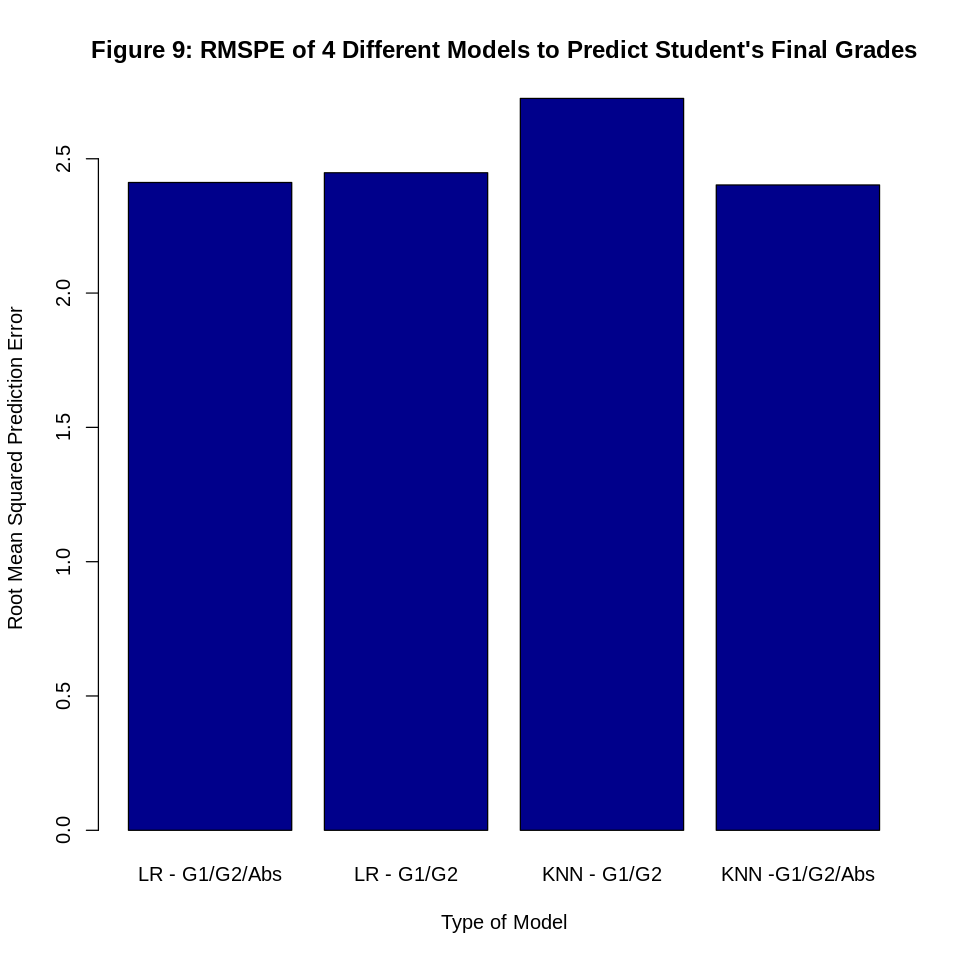

In [40]:
# Now visualizing the RMSPE of all the models we did previously

options(repr.plot.width = 8, repr.plot.height = 8)


knn_mult_mets_rmse <- pull(knn_mult_mets, .estimate)
knn_mult_mets_3_rmse <- pull(knn_mult_mets_3, .estimate)

model_results <- c(lm_rmspe, lm_rmspe_1, knn_mult_mets_rmse, knn_mult_mets_3_rmse)

barplot(model_results,
       main = "Figure 9: RMSPE of 4 Different Models to Predict Student's Final Grades",
       xlab = "Type of Model",
        ylab = "Root Mean Squared Prediction Error",
       names.arg = c("LR - G1/G2/Abs", "LR - G1/G2", "KNN - G1/G2", "KNN -G1/G2/Abs"),
        col = "darkblue"
)

## **Discussion**

#### Summarize of what we found:


##### What we found during exploratory data analysis:

- Age does not have a strong correlation with final grades attained by students.
- G1 (grades from Term I) and G3 (final grades) have a strong positive correlation.  
- G2 (grades from Term II) and G3 (final grades) also have a fairly strong positive correlation. 
- Absences have a decent correlation with students’ final grades (G3). 


##### What we found from the prediction models:

**It seems like using a KNN model with predictors G1, G2, and Absences is the most predictive for our student data. Purely evaluating the performance of the models with RMPSE, we would go with the K-NN model with predictors G1, G2 and Absences.**

However, there are some considerations that should be made:

- Although K-NN performs better, it is harder to explain. When we did Linear Regression, we had a formula we could interpret. If we were ever to present this to someone else and have it be easily understood, a Linear Regression could prove itself to be more advantageous.
- Since our model involves predicting grades, which requires very accurate numerical values, the linear regression provides us with a slope and intercept that would potentially make it easier to calculate these values.
- Moreover, a straight line allows us to see whether the data shows rising or declining trends, that could be used to study whether current education policies are leading to improvements or not, and whether this improvement is at a desired pace. For example, if we were to add a new variable into this data set called "# of hours with a tutor" and the linear regression slope is positive, then we know that there is a positive effect. These implications are further elaborated in the discussion session.
- In addition, if we were to use more and more training data, the K-NN neighbors classification algorithm could get slower. If we wanted to use more and more predictors, K-NN might not perform as well either. In these circumstances, we should switch to using linear regression. 
- It seems that when we added absence as a predictor for both Linear Regression and K-NN, it improved the prediction. However, as the slope of absences was positive and we can't explain it, this variable should be used with caution. Further research should be done. 



#### Discussion of what we expected to find:
- We expected the age of students to also have a notable effect on the final grades (G3) that are obtained, hence our selection of it as a factor to predict G3. From our visualisation, we discovered that this expectation was contrary to reality since we realised there was a lack of strong correlation between the two. Therefore, this was not what we expected to find. 
- In addition, in our hypothesis we mentioned that we thought linear regression would be the better performing model. However, it was actually K-NN regression that performed better on a RMPSE basis
- Finally, in our hypothesis we also stated that we thought absences would improve the model. It seems that we were correct!

#### Discussion of what impact our findings could have:
- As we stated in our introduction, education is an extremely powerful determinant of the manner in which our lives pan out, the quality of life we have and how successful we are. Hence, the more information we have relating to improving education systems, institutions and methods, the better it is. 
- Our findings have significant implications for educational policy and potential actions to be taken to improve students’ academic performances. 
- We also found that G1 (Term I grades) and G2 (Term II grades) have a strong positive correlation with G3 (final grades). This means that it is important for students to perform well academically throughout the school year in order to secure a good final grade. This implies that students need to be incentivized and supported throughout the year so they secure good Term I and Term II grades (G1 and G2 respectively) and eventually hopefully good final grades (G3). 
- Furthermore, we observed that age and G3 do not have a strong correlation. This finding has implications for how much future initiatives should account for age when trying to boost grades i.e. not give it as much weight. 


#### Discussion of what future questions this could lead to:
- What factors contribute to good Term I (G1) and Term II (G2) grades that will eventually result in a good final grade (G3)?
- What policy decisions can be looked at to bolster academic participation and excellence?
- To what extent should schools incentivise students to regularly attend school?
- What additional factors are highly correlated to a good final grade that are not featured in this data set? 
- What are student factors that are negatively correlated to the final grade and how can those impacts be reduced?

### **References**:

The source used to extract data  
- P. Cortez and A. Silva. (2008). Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, EUROSIS, ISBN 978-9077381-39-7.  

Other sources 
- Bhardwaj,  A.  (2016).Importance  of  Education  in  Human  Life:  a  Holistic Approach.   International  Journal  of  Science and  Consciousness; 2(2): 23-  28. 
- Uyanık, G. K., & Güler, N. (2013). A study on multiple linear regression analysis. Procedia - Social and Behavioral Sciences, 106, 234–240. https://doi.org/10.1016/j.sbspro.2013.12.027 
- Jolliffe, I. T. (1986). Principal components in regression analysis. In Principal component analysis (pp. 129-155). Springer, New York, NY.
- Baum, S., Ma, J., & Payea, K. (2013). Education Pays, 2013: The Benefits of Higher Education for Individuals and Society. Trends in Higher Education Series. College Board.


### **End of Project!!**

Thank you to Professor Trevor Campbell and all the TA's so much for this amazing semester, and happy holidays!